<a href="https://colab.research.google.com/github/davinavc/Data-Analyst/blob/main/Retail/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing the libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#loading data
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
df.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [13]:
#Adding order_month column to dataset
df['order_month'] = df['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(df.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [14]:
df['gmv'] = df['item_price']*df['quantity']
print('Dataset size: %d rows dan %d columns\n' % df.shape)
print('Top 5 data:')
print(df.head())

Dataset size: 5000 rows dan 11 columns

Top 5 data:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [15]:
#Creating Aggregate Data
monthly_amount =  df.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


In [16]:
#Fetching information on the top 5 brands based on quantity
top_brands = (df[df['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

In [17]:
#Creating a new dataframe, filtering only for December 2019 and top 5 brands
df_top5brand_dec = df[(df['order_month']=='2019-12') & (df['brand'].isin(top_brands['brand'].to_list()))]

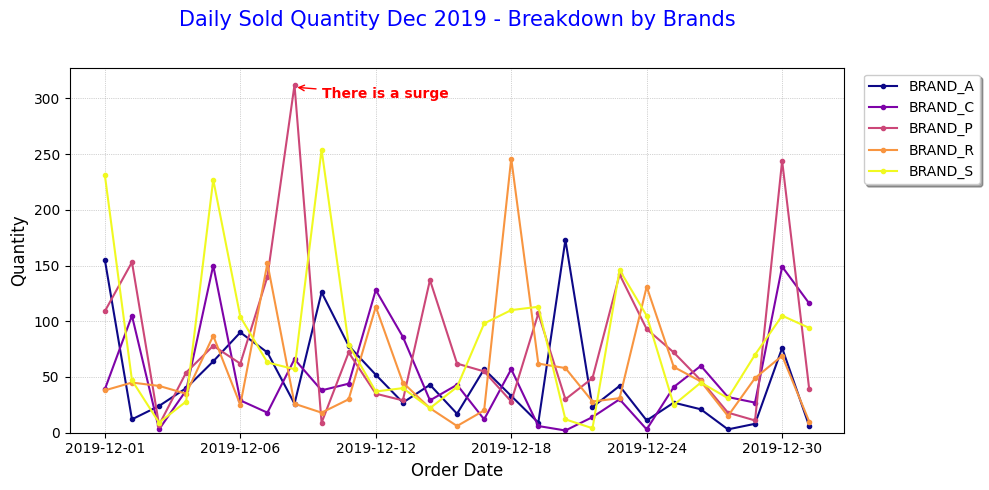

In [18]:
#multiline chart daily quantity for brand top 5
df_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('There is a surge', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

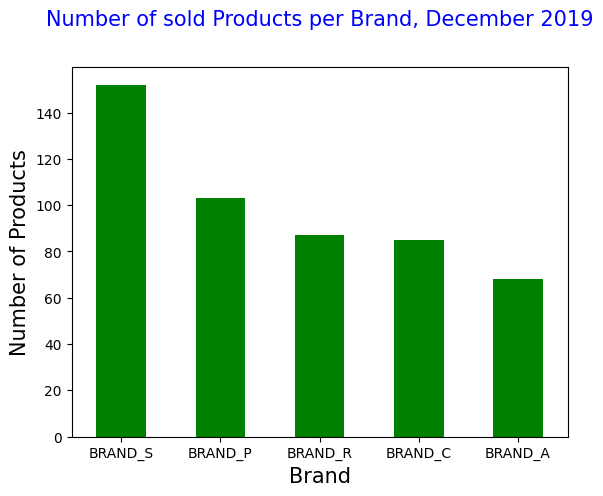

In [19]:
# Bar Chart The sales quantity of the top 5 brands during December 2019.
plt.clf()
df_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

In [20]:
# Using a stacked chart for a breakdown bar chart, between products sold >= 100 and < 100 in December 2019.
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
df_top5brand_dec_per_product = df_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

In [21]:
#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
df_top5brand_dec_per_product['quantity_group'] = df_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x >=100 else '< 100')
df_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)


In [22]:
#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = df_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

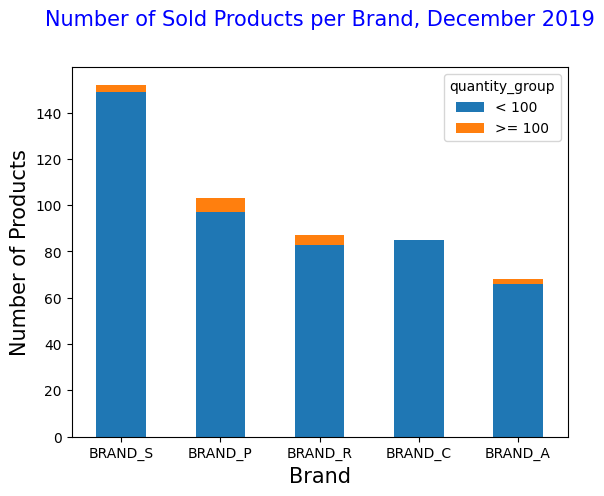

In [23]:
#plot stacked barchart
df_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

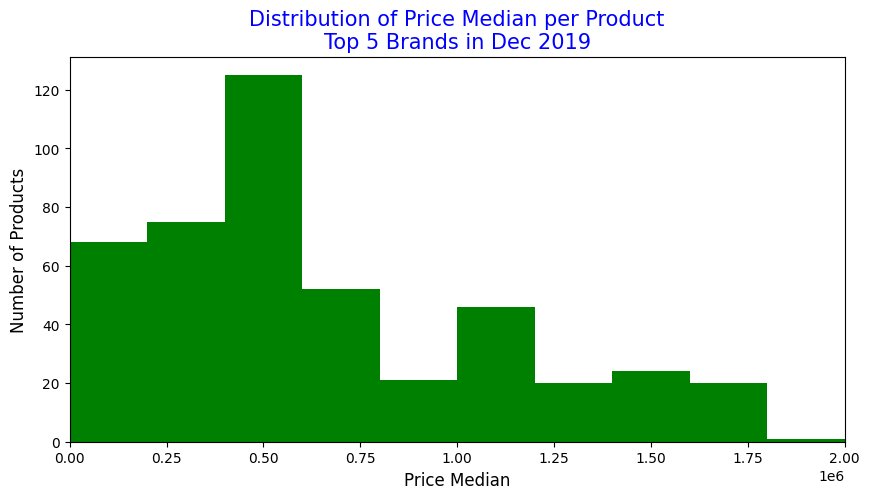

In [24]:
# Using a histogram to visualize the distribution of prices for the products within the top 5 brands (for each product_id, take the median price).
plt.figure(figsize=(10,5))
plt.hist(df_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

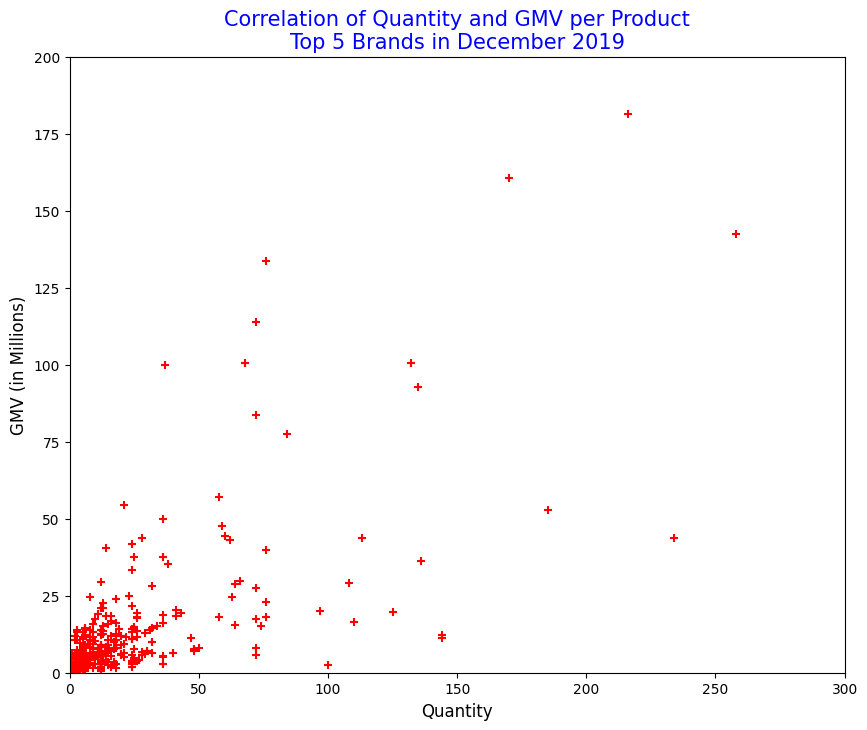

In [25]:
# Using a scatter plot to check the correlation between quantity and GMV.
#agregat per product
data_per_product_top5brand_dec = df_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 640x480 with 0 Axes>

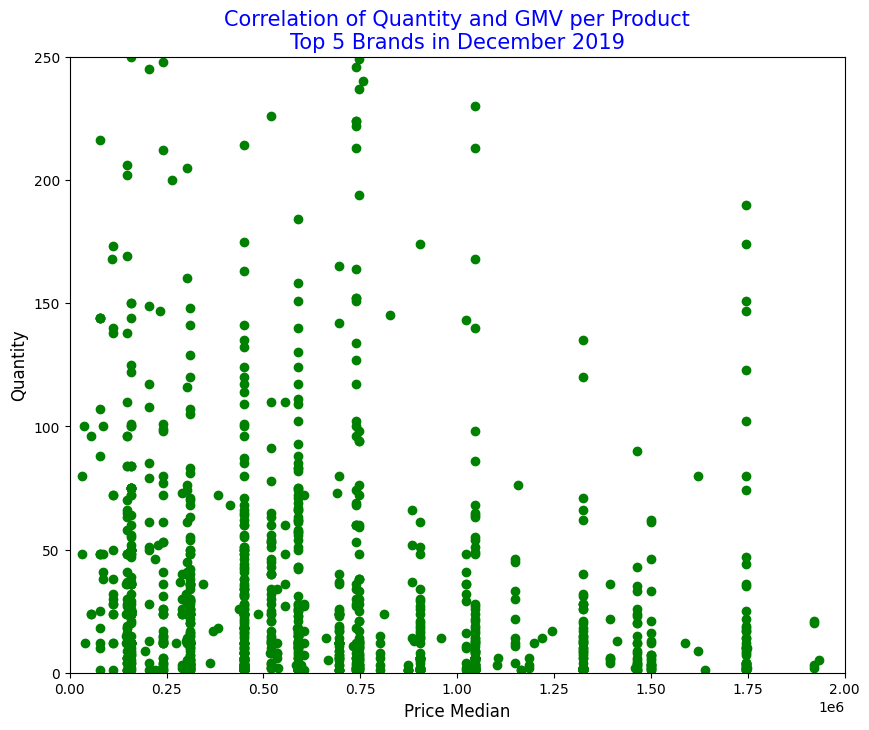

In [27]:
# Using a scatter plot to check the correlation between median price and quantity.
plt.clf()
#agregat per product
data_per_product_top5brand_dec = df.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()